In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
#import plotly.express as px
import seaborn as sns

%matplotlib inline
#mpl.style.use( 'ggplot' )
#plt.style.use('fivethirtyeight')
#sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

In [2]:
# load data
data=pd.read_csv("diamonds.csv")

data.shape

data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Verify if there are any null values, if so remove the lines with them

In [4]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Check if there are lines with impossible values

In [5]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


The features x, y and z have a minimum of 0, which does not make sense

In [6]:
data.loc[(data['x']==0) | (data['y']==0) | (data['z']==0)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
2207,2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


Not that many lines, so we will remove them as they wont impact the models significantly

In [7]:
data = data[(data[['x','y','z']] != 0).all(axis=1)]

In [8]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,26972.355731,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,15571.269010,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13487.750000,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26973.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.250000,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Delete "Unnamed 0" column as it does not have any use, since it only lists the index of each row, which pd does for us

In [9]:
del data['Unnamed: 0']
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


For this project, we will choose cut as the label

In [10]:
data.cut.value_counts()

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

Some histograms for every numeric feature

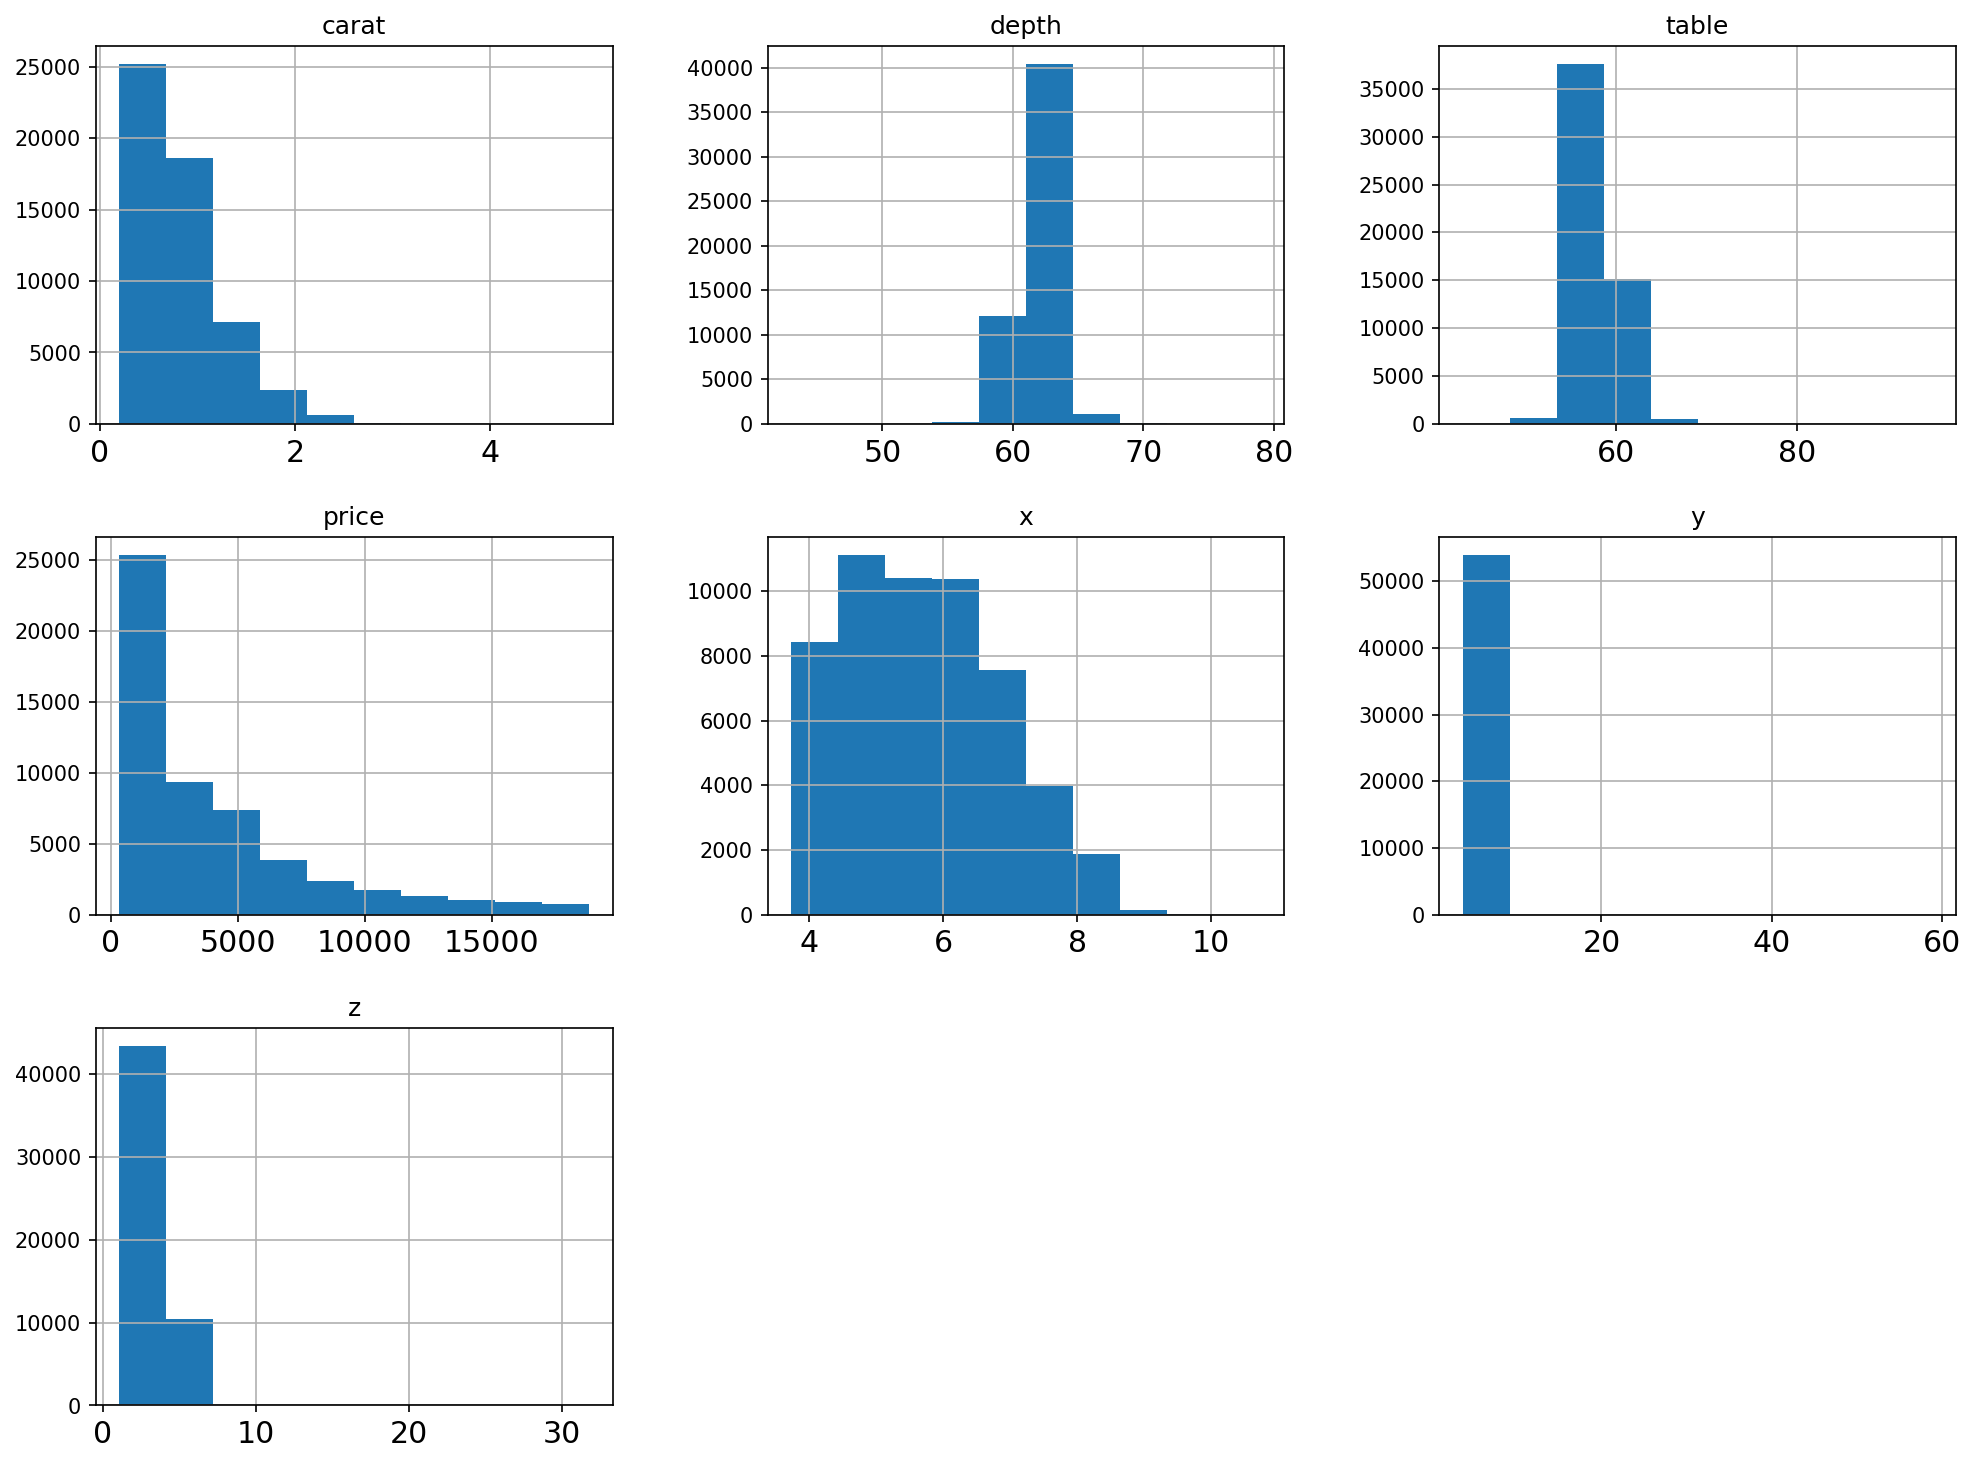

In [11]:
data.hist(figsize=(16, 12));

Both price and carat have skewed distributions, which are distributions where one of the tails is larger than the other. When this happens, we should fix them by using a logarithmic transformer

# Todo
Meter cenas aqui do site externo(Gonçalo)
    criar pipelines dos transformers para cada classifier(acho que temos que retirar 1 ou 2 dos que tinhamos, para ser mais simpels, mas depois ve-se)
    fazer a parte do f1 score e assim do site externo
    fazer a ultima parte do hyperparameter tuning para cada (ou talvez para o melhor apenas?) classifier (nao e so copy paste, e preciso alterar aquilo bastante)

Make the data correlation, to see what features are more dependent on each other

<AxesSubplot:>

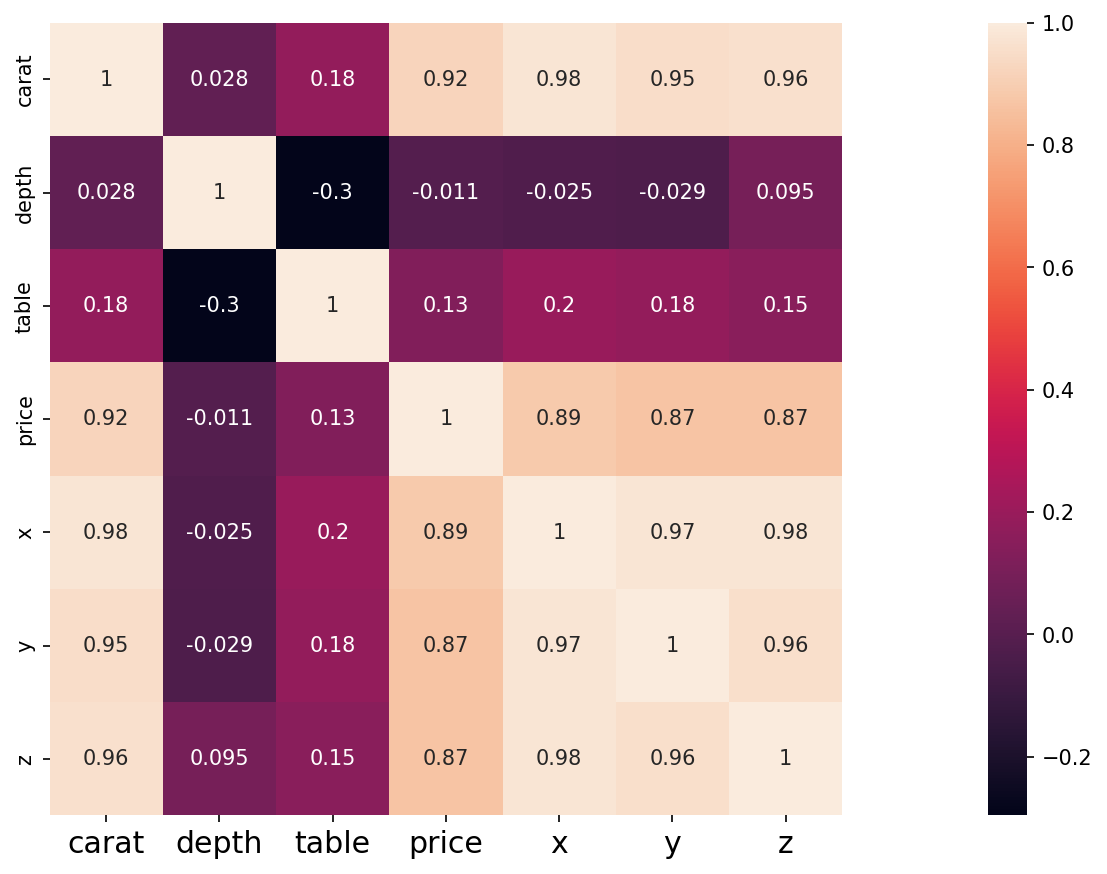

In [12]:
corr = data.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

## Native multiclass classifiers

In [13]:
from sklearn.model_selection import train_test_split


# Build a synthetic dataset
X, y = data.drop("cut", axis=1), data["cut"].values.flatten()



# Create train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1121218, test_size=0.33, stratify=y
)


In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder, PowerTransformer, StandardScaler
  )

# Build categorical preprocessor
categorical_cols = X.select_dtypes(include="object").columns.to_list()
categorical_pipe = make_pipeline(
    OneHotEncoder(sparse=False, handle_unknown="ignore")
  )

# Build numeric processor
to_log = ["price", "carat"]
to_scale = ["x", "y", "z", "depth", "table"]
numeric_pipe_1 = make_pipeline(PowerTransformer())
numeric_pipe_2 = make_pipeline(StandardScaler())

# Full processor
full = ColumnTransformer(
    transformers=[
        ("categorical", categorical_pipe, categorical_cols),
        ("power_transform", numeric_pipe_1, to_log),
        ("standardization", numeric_pipe_2, to_scale),
    ]
)

# Final pipeline combined with RandomForest
pipeline = Pipeline(
    steps=[
        ("preprocess", full),
        (
            "base",
            RandomForestClassifier(max_depth=13),
        ),
    ]
)
# Fit
_ = pipeline.fit(X_train, y_train)

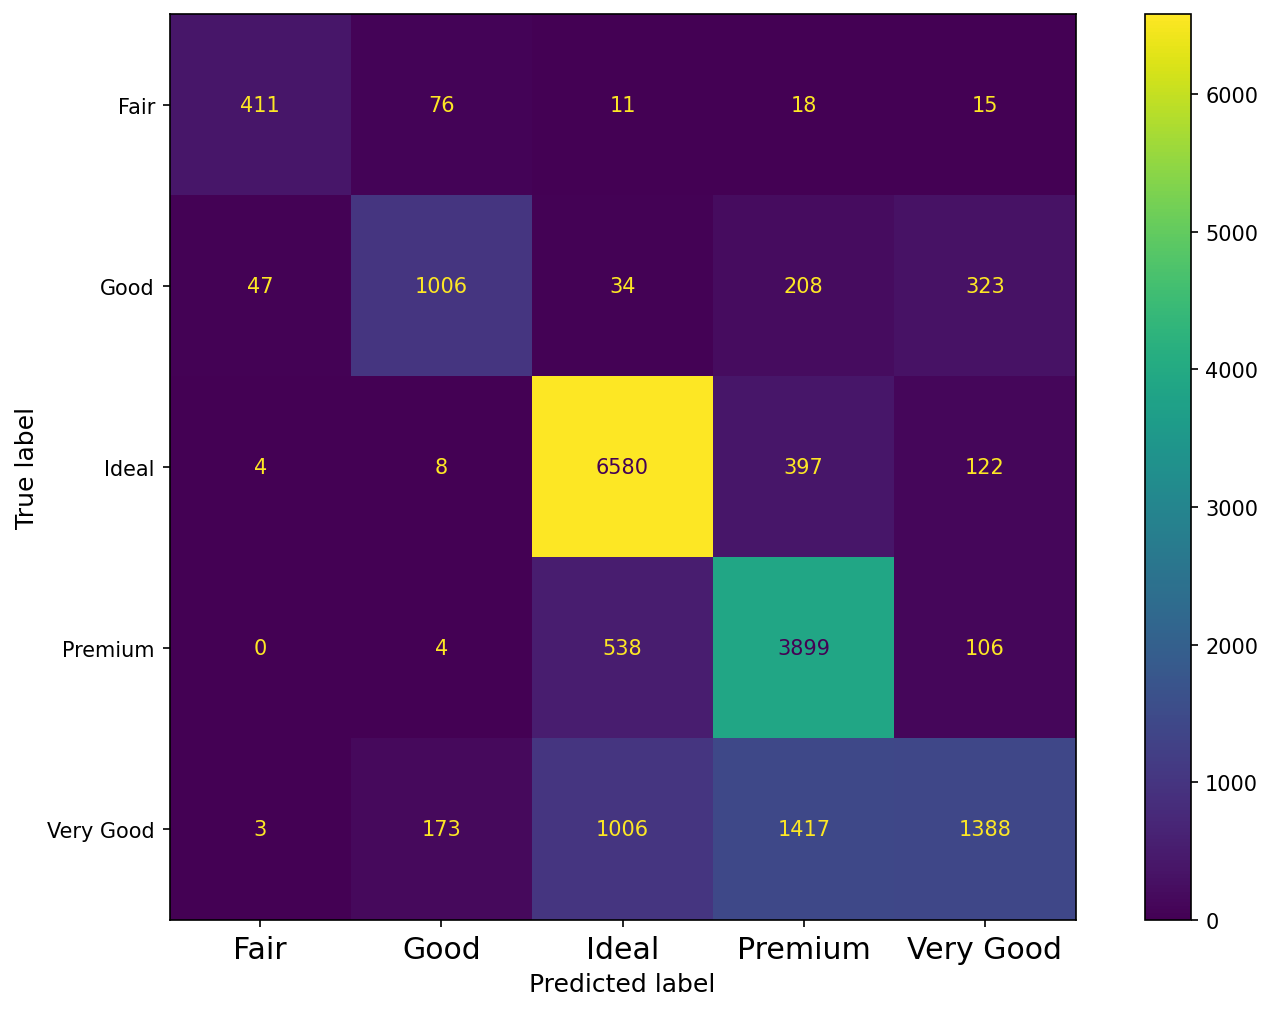

In [15]:

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = pipeline.predict(X_test)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))
# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=pipeline.classes_)
cmp.plot(ax=ax)

plt.show();

Positive classes: Ideal and Premium diamonds
Negative classes: Very Good, Good, and Fair diamonds
True Positives, type 1: actual Ideal, predicted Ideal
True Positives, type 2: actual Premium, predicted Premium
True Negatives: the rest of the diamond types predicted correctly
False Positives: actual value belongs to any of the 3 negative classes but predicted either Ideal or Premium
False Negatives: actual value is either Ideal or Premium but predicted by any of the 3 negative classes.

## Precision, Recall and F1 scores for multiclass classification

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Fair       0.88      0.77      0.83       531
        Good       0.79      0.62      0.70      1618
       Ideal       0.81      0.93      0.86      7111
     Premium       0.66      0.86      0.74      4547
   Very Good       0.71      0.35      0.47      3987

    accuracy                           0.75     17794
   macro avg       0.77      0.71      0.72     17794
weighted avg       0.75      0.75      0.73     17794



## Hyperparameter tuning to optimize model performance for a custom metric

In [21]:

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
min_samples_split = [2, 5, 7, 10]
min_samples_leaf = [1, 2, 3, 4]

param_grid = {
    "base__n_estimators": n_estimators,
    "base__max_depth": max_depth,
    "base__min_samples_split": min_samples_split,
    "base__min_samples_leaf": min_samples_leaf,
}

In [28]:

from sklearn.metrics import make_scorer

custom_f1 = make_scorer(
    f1_score, greater_is_better=True, average="weighted", labels=["Ideal", "Premium"]
  )



In [29]:

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

hrs = HalvingRandomSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    scoring=custom_f1,
    cv=3,
    n_candidates="exhaust",
    factor=5,
    n_jobs=-1,
)
# Fit
_ = hrs.fit(X, y)

# Score
best_estimator = hrs.best_estimator_
_ = model.fit(X_train, y_train)
y_preds = model.predict(X_test)
f1_score(y_test, preds, average="weighted", labels=["Ideal", "Premium"])

/home/vicente/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 1760 is smaller than n_iter=1797. Running 1760 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 